In [87]:
from environment import State, Environment, distance
from environment import DEFAULT_START_ST, DEFAULT_GOAL_ST, SIMPLE_CONFIG
from lazy_rrg import LazyRRGPlanner
from prm import PRMStar
from utils import compute_path_cost

import random
import json

import numpy as  np
import matplotlib.pyplot as plt

SEED=42
random.seed(SEED)
np.random.seed(SEED)

### Environment Configuration

In [88]:
start_state = State(*DEFAULT_START_ST)
goal_state = State(*DEFAULT_GOAL_ST)
env = Environment.from_config(start_state, SIMPLE_CONFIG)

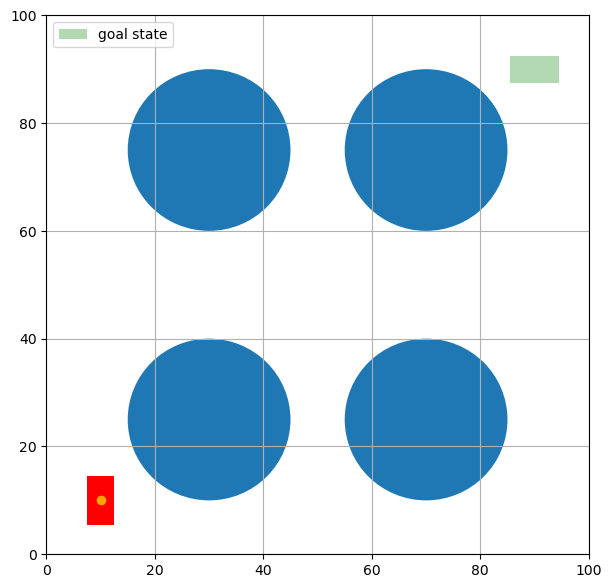

In [89]:
env.render(goal_state=State(*DEFAULT_GOAL_ST))

# Planning algorithm experiments

## Experiments with  Lazy-RRG* Planner

In [90]:
a = np.array([1, 2, 3])
b = np.array([2, -1, 10])
np.minimum(a, b)

array([ 1, -1,  3])

In [91]:
def uniform_environment_sampler():
    x = np.random.uniform(0, env._env_size[0])
    y = np.random.uniform(0, env._env_size[1])
    angle = np.random.uniform(-180, 180)
    return State(np.array([x, y]), angle)

In [95]:
planner = LazyRRGPlanner(
    env,
    distance_fn=distance,
    env_sampler=uniform_environment_sampler,
    k=30
)

rrg_path = planner.plan(
    start_state=start_state,
    goal_state=goal_state,
    N=500,
)

In [96]:
len(rrg_path)

1

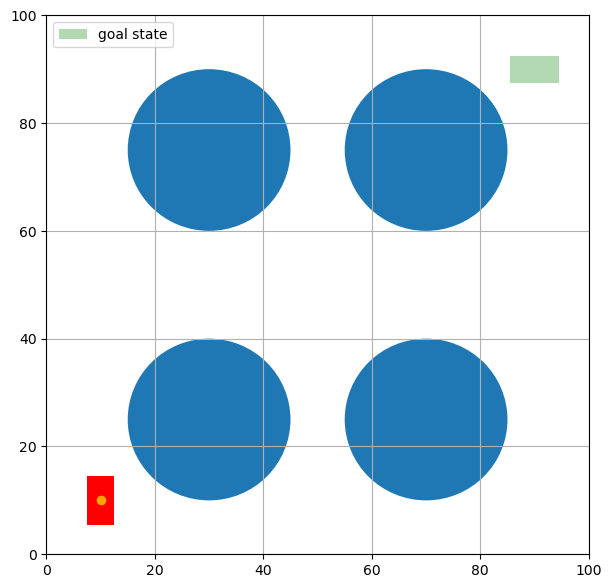

In [97]:
env.render(goal_state=rrg_path[-1], path=rrg_path)
plt.show()

## Experiment with PRM

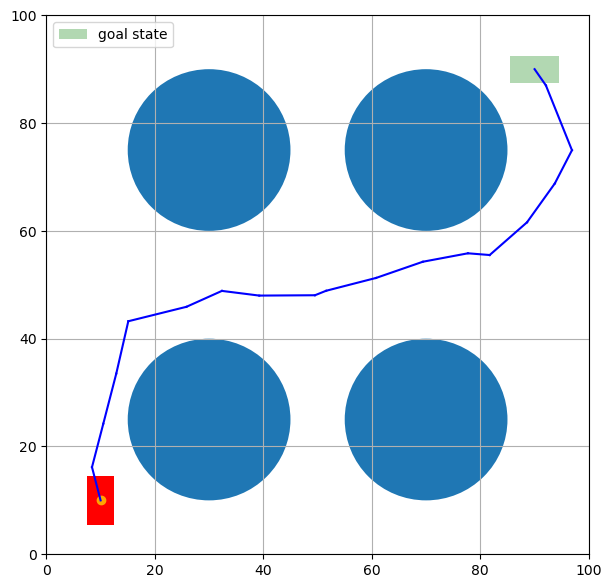

In [2]:
env = Environment.from_config(State(*DEFAULT_START_ST), SIMPLE_CONFIG)
prm_star = PRMStar(env, num_samples=500, k=15)

start_state = State(*DEFAULT_START_ST)
goal_state = State(*DEFAULT_GOAL_ST)
prm_star.build_roadmap(start_state, goal_state)

path = prm_star.find_path(start_state, goal_state)

# Visualization
prm_star.render(path)

In [11]:
f"PRM path cost: {compute_path_cost(path):.3f}"

'PRM path cost: 144.945'